In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd '/content/gdrive/Shareddrives/520 - Machine Learning Project/'

/content/gdrive/Shareddrives/520 - Machine Learning Project


In [ ]:
import PIL
import tensorflow as tf

# load and show an image with Pillow
from PIL import Image
import sklearn
import torch
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline

## READING THE DATA AND TRIVIAL MANIPULATIONS

In [ ]:
# setting paths 
BASE_DIR = 'Dataset/'

NORMAL_DIR = os.path.join(BASE_DIR + 'Normal/')
PNEUMONIA_DIR = os.path.join(BASE_DIR + 'Viral Pneumonia/')
COVID_DIR = os.path.join(BASE_DIR + 'COVID/')

print(len(os.listdir(NORMAL_DIR)))
print(len(os.listdir(PNEUMONIA_DIR)))
print(len(os.listdir(COVID_DIR)))

1230
1345
2000


In [ ]:
# setting paths - Small dataset (used to train TL model)
BASE_DIR = 'Dataset/'

SMALL_NORMAL_DIR = os.path.join(BASE_DIR + 'Normal2/')
SMALL_PNEUMONIA_DIR = os.path.join(BASE_DIR + 'Viral_Pneumonia2/')
SMALL_COVID_DIR = os.path.join(BASE_DIR + 'COVID2/')

print(len(os.listdir(SMALL_NORMAL_DIR)))
print(len(os.listdir(SMALL_PNEUMONIA_DIR)))
print(len(os.listdir(SMALL_COVID_DIR)))

500
500
500


In [ ]:
# Reading the data
loaded_images = []
normal = []
pneumonia = []
covid = []
labels = []
IMG_SIZE = 299

In [ ]:
for filename in os.listdir(NORMAL_DIR):
	# load image
  img_data = Image.open(NORMAL_DIR + filename)
  img_data = img_data.resize((IMG_SIZE, IMG_SIZE))
  img_data = img_data.convert("RGB")
	# store loaded image
  loaded_images.append(img_data)
  normal.append(img_data)
  labels.append(0)

for filename in os.listdir(COVID_DIR):
  # load image
  img_data = Image.open(COVID_DIR + filename)
  img_data = img_data.resize((IMG_SIZE, IMG_SIZE))
  img_data = img_data.convert("RGB")
	# store loaded image
  loaded_images.append(img_data)
  covid.append(img_data)
  labels.append(1)

for filename in os.listdir(PNEUMONIA_DIR):
  # load image
  img_data = Image.open(PNEUMONIA_DIR + filename)
  img_data = img_data.resize((IMG_SIZE, IMG_SIZE))
  img_data = img_data.convert("RGB")
	# store loaded image
  loaded_images.append(img_data)
  pneumonia.append(img_data)
  labels.append(2)

In [ ]:
print(len(labels))
print(len(loaded_images))

4575
4575


In [ ]:
def convert_and_flatten(image):
  image = np.asarray(image)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = image.flatten()
  # print(image.shape)
  return image

In [ ]:
X = [convert_and_flatten(image) for image in loaded_images]
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

3660
915


In [ ]:
print(np.asarray(loaded_images[0]).shape)

(299, 299, 3)


In [ ]:
print(X_train[0].shape)

(89401,)


In [ ]:
# def read_data(class_name, IMG_SIZE=299, NORMAL_DIR=NORMAL_DIR, COVID_DIR=COVID_DIR, PNEUMONIA_DIR=PNEUMONIA_DIR):
#   loaded_images = []
#   labels = []
#   for filename in os.listdir(NORMAL_DIR):
#       img_data = Image.open(NORMAL_DIR + filename)
#       img_data = img_data.resize((IMG_SIZE, IMG_SIZE))
#       img_data = img_data.convert("RGB")
#       loaded_images.append(img_data)
#       labels.append(0)
    
#   if class_name =='covid':
#     for filename in os.listdir(COVID_DIR):
#       img_data = Image.open(COVID_DIR + filename)
#       img_data = img_data.resize((IMG_SIZE, IMG_SIZE))
#       img_data = img_data.convert("RGB")
#       loaded_images.append(img_data)
#       labels.append(1)
  
#   elif class_name == 'pneumonia':
#     for filename in os.listdir(PNEUMONIA_DIR):
#       img_data = Image.open(PNEUMONIA_DIR + filename)
#       img_data = img_data.resize((IMG_SIZE, IMG_SIZE))
#       img_data = img_data.convert("RGB")
#       loaded_images.append(img_data)
#       labels.append(1)

#   return loaded_images, labels

## EXPLORATORY DATA ANALYSIS, PREPROCESSING

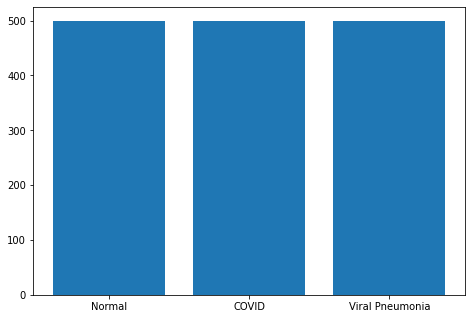

In [ ]:
#Samples per class
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['Normal', 'COVID', 'Viral Pneumonia']
y = [len(os.listdir(SMALL_NORMAL_DIR)), len(os.listdir(SMALL_COVID_DIR)), len(os.listdir(SMALL_PNEUMONIA_DIR))]
ax.bar(x,y)
plt.show()

INFERENCE AND ASSUMPTIONS GOING FORWARD:

1.   For this application, the main goal is to recognise Covid-19 patients. It will be interesting to see if the model will have greater difficulty in identifying Pneumonia or Covid samples.
2.   Similar to other health conditions, prediction problems or unbalanced datasets, it is necessary to prioritise Precision or Recall, since Accuracy can be misleading. The F1-Score is also a reasonable option.

## Analysis - different forms, what is needed:
---

**Baseline Models**
---

1. No-model (mode of the data)

2. Logistic Regression (with hyperparameter tuning)

3. Decision Trees (with hyperparameter tuning)

4. KNN (Change the value of k=1:20)

5. Ensemble Methods (Random Forest, Bagging, ExtraTreeClassifier) 

**Metrics**

---

1.   Recall
2.   F1 Score
3.   ROC AUC
4.   Accuracy
5.   Precision

**Inferences/TODOs**

---


1. Which has the highest recall - best model among baseline models
2. Size of dataset
3. Effect of Regularization
4. Overfitting in DTs
5. Effect of Hyperparameter tuning
6. Effect of Feature Scaling
7. Effect on unseen data (new dataset)
8. Individual class precision and recall (for Pneumonia and COVID only)
9. Training all together, vs training separately



### confusion matrix params

In [ ]:
def extract_metrics(confusion_matrix):
  scores = {0:{}, 1:{}, 2:{}}
  for i in range(len(confusion_matrix)):
    matrix = confusion_matrix[i]
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TP = matrix[1][1]
    total = TP + TN + FP + FN
    accuracy = (TP+TN)/total
    precision = (TP)/(TP + FP)
    recall = TP/(TP + FN)
    f1 = (2*precision*recall)/(precision + recall)
    scores[i]['accuracy'] = accuracy
    scores[i]['recall'] = recall
    scores[i]['precision'] = precision
    scores[i]['f1'] = f1
  return scores

def overall_metrics(confusion_matrix):
  pass

def print_metrics(scores):
  for i in range(len(scores)):
    score_curr = scores[i]
    print(f"Class {i} \n Accuracy: {score_curr['accuracy']} \n Precision: {score_curr['precision']} \n Recall: {score_curr['recall']} \n f1: {score_curr['f1']}")
    print()

def perform_metric_calculations(confusion_matrix):
  scores = extract_metrics(confusion_matrix)
  # overall_scores = overall_metrics(confusion_matrix)
  print_metrics(scores)

# PART 1 - Normal and Pneumonia

## Reading the data

In [ ]:
# loaded_images, labels = read_data('pneumonia')
# X = [convert_and_flatten(image) for image in loaded_images]
# y = np.array(labels)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# print(len(X_train))
# print(len(X_test))
# print(len(y_train))
# print(len(y_test))

800
200
800
200


In [ ]:
print(np.array(X_train).shape)
print(X_train[0][:10])

(800, 268203)
[36 36 36 42 42 42 47 47 47 52]


## Logistic Regression

###Larger dataset

In [ ]:
# LOGISTIC REGRESSION WITH NO REGULARIZATION
model = LogisticRegression(penalty='none', max_iter=100)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds, average = 'weighted'))
print("Recall: ", recall_score(y_test, preds, average = 'weighted'))
print("F1: ", f1_score(y_test, preds, average = 'weighted'))
# print("ROC: ", roc_auc_score(y_test, preds, average = 'weighted'))

Overall scores
-------------------------------------------
Accuracy:  0.8646288209606987
Precision:  0.8635836603223387
Recall:  0.8646288209606987
F1:  0.8635343427793669


In [ ]:
# LOGISTIC REGRESSION WITH NO REGULARIZATION - INCREASE ITERATIONS
model = LogisticRegression(penalty='none', max_iter=1000) ## did converge, but accuracy is lower
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds, average = 'weighted'))
print("Recall: ", recall_score(y_test, preds, average = 'weighted'))
print("F1: ", f1_score(y_test, preds, average = 'weighted'))

Overall scores
-------------------------------------------
Accuracy:  0.8427947598253275
Precision:  0.8415638932225585
Recall:  0.8427947598253275
F1:  0.8406387146906567


In [ ]:
# LOG REG WITH L2 PENALTY
model = LogisticRegression(penalty='l2', max_iter=100)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds, average = 'weighted'))
print("Recall: ", recall_score(y_test, preds, average = 'weighted'))
print("F1: ", f1_score(y_test, preds, average = 'weighted'))

Overall scores
-------------------------------------------
Accuracy:  0.8557377049180328
Precision:  0.8557381533434208
Recall:  0.8557377049180328
F1:  0.8555188946451365


In [ ]:
# LOG REGRESSION WITH FEATURE SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(penalty='none', max_iter=100)
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)


print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds, average = 'weighted'))
print("Recall: ", recall_score(y_test, preds, average = 'weighted'))
print("F1: ", f1_score(y_test, preds, average = 'weighted'))

Overall scores
-------------------------------------------
Accuracy:  0.8622950819672132
Precision:  0.8611924475626406
Recall:  0.8622950819672132
F1:  0.8615066586593922


### Smaller dataset

In [ ]:
# LOGISTIC REGRESSION WITH NO REGULARIZATION
model = LogisticRegression(penalty='none', max_iter=100)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.91
Precision:  0.93
Recall:  0.8942307692307693
F1:  0.911764705882353
ROC:  0.9106570512820512


In [ ]:
# LOGISTIC REGRESSION WITH NO REGULARIZATION
model = LogisticRegression(penalty='none', max_iter=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.91
Precision:  0.93
Recall:  0.8942307692307693
F1:  0.911764705882353
ROC:  0.9106570512820512


In [ ]:
# LOGISTIC REGRESSION WITH NO REGULARIZATION
model = LogisticRegression(penalty='l2', max_iter=100)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.91
Precision:  0.9215686274509803
Recall:  0.9038461538461539
F1:  0.9126213592233009
ROC:  0.9102564102564101


#### feature scaling

In [ ]:
# LOG REGRESSION WITH FEATURE SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(penalty='none', max_iter=100)
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)


print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.935
Precision:  0.941747572815534
Recall:  0.9326923076923077
F1:  0.9371980676328503
ROC:  0.9350961538461539


In [ ]:
# LOG REGRESSION WITH FEATURE SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(penalty='l2', max_iter=100)
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)


print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.915
Precision:  0.9306930693069307
Recall:  0.9038461538461539
F1:  0.9170731707317074
ROC:  0.9154647435897436


## Decision Trees

### Large dataset

#### DECISION TREE WITH NO HYPERPARAMETER TUNING

In [ ]:
# VANILLA DT
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds, average = 'weighted'))
print("Recall: ", recall_score(y_test, preds, average = 'weighted'))
print("F1: ", f1_score(y_test, preds, average = 'weighted'))

Overall scores
-------------------------------------------
Accuracy:  0.774863387978142
Precision:  0.7717349096397477
Recall:  0.774863387978142
F1:  0.7721365544594695


In [ ]:
# DT with max depth = 7
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
preds = model.predict(X_test)


print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds, average = 'weighted'))
print("Recall: ", recall_score(y_test, preds, average = 'weighted'))
print("F1: ", f1_score(y_test, preds, average = 'weighted'))

Overall scores
-------------------------------------------
Accuracy:  0.7879781420765027
Precision:  0.7866024814867287
Recall:  0.7879781420765027
F1:  0.7818749571210339


#### DECISION TREE WITH ENTROPY

In [ ]:
# DT WITH ENTROPY
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
preds = model.predict(X_test)
print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds, average = 'weighted'))
print("Recall: ", recall_score(y_test, preds, average = 'weighted'))
print("F1: ", f1_score(y_test, preds, average = 'weighted'))

Overall scores
-------------------------------------------
Accuracy:  0.7836065573770492
Precision:  0.7840586320152605
Recall:  0.7836065573770492
F1:  0.7838168217656795


### Small Dataset

In [ ]:
# VANILLA DT
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.81
Precision:  0.7894736842105263
Recall:  0.8653846153846154
F1:  0.8256880733944955
ROC:  0.8076923076923077


In [ ]:
# DT
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
preds = model.predict(X_test)


print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.78
Precision:  0.7678571428571429
Recall:  0.8269230769230769
F1:  0.7962962962962962
ROC:  0.7780448717948718


In [ ]:
# DT WITH ENTROPY
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.78
Precision:  0.7678571428571429
Recall:  0.8269230769230769
F1:  0.7962962962962962
ROC:  0.7780448717948718


## Ensemble Methods

### Large Dataset

In [ ]:
# ENSEMBLE METHOD
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds, average = 'weighted'))
print("Recall: ", recall_score(y_test, preds, average = 'weighted'))
print("F1: ", f1_score(y_test, preds, average = 'weighted'))

Overall scores
-------------------------------------------
Accuracy:  0.8994535519125683
Precision:  0.9013981045093222
Recall:  0.8994535519125683
F1:  0.8971396148958636


In [ ]:
# ENSEMBLE METHOD - RF
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)



print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds, average = 'weighted'))
print("Recall: ", recall_score(y_test, preds, average = 'weighted'))
print("F1: ", f1_score(y_test, preds, average = 'weighted'))

Overall scores
-------------------------------------------
Accuracy:  0.892896174863388
Precision:  0.8956150745883478
Recall:  0.892896174863388
F1:  0.8903944831165496


In [ ]:
# ENSEMBLE METHOD - RF - HYPERPARAMETER TUNING
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)
preds = model.predict(X_test)
 
print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds, average = 'weighted'))
print("Recall: ", recall_score(y_test, preds, average = 'weighted'))
print("F1: ", f1_score(y_test, preds, average = 'weighted'))

Overall scores
-------------------------------------------
Accuracy:  0.8950819672131147
Precision:  0.897467939759889
Recall:  0.8950819672131147
F1:  0.892265464387739


In [ ]:
# ENSEMBLE METHOD - BAGGING
model = BaggingClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds, average = 'weighted'))
print("Recall: ", recall_score(y_test, preds, average = 'weighted'))
print("F1: ", f1_score(y_test, preds, average = 'weighted'))

Overall scores
-------------------------------------------
Accuracy:  0.8633879781420765
Precision:  0.8628161655023652
Recall:  0.8633879781420765
F1:  0.8616820968742083


### Small Dataset

In [ ]:
# ENSEMBLE METHOD
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)


print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.95
Precision:  0.9433962264150944
Recall:  0.9615384615384616
F1:  0.9523809523809524
ROC:  0.9495192307692308


In [ ]:
# ENSEMBLE METHOD - RF
model = RandomForestClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)


print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.93
Precision:  0.9166666666666666
Recall:  0.9519230769230769
F1:  0.9339622641509433
ROC:  0.9290865384615384


In [ ]:
# ENSEMBLE METHOD - RF - HYPERPARAMETER TUNING
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.91
Precision:  0.8909090909090909
Recall:  0.9423076923076923
F1:  0.9158878504672897
ROC:  0.9086538461538461


In [ ]:
# ENSEMBLE METHOD - BAGGING
model = BaggingClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.88
Precision:  0.9081632653061225
Recall:  0.8557692307692307
F1:  0.8811881188118811
ROC:  0.8810096153846154


# PART 2 - Normal and Covid

##Reading the data

In [ ]:
loaded_images, labels = read_data('covid', IMG_SIZE=299)
X = [convert_and_flatten(image) for image in loaded_images]
y = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

800
200
800
200


## Logistic Regression

In [ ]:
# LOGISTIC REGRESSION WITH NO REGULARIZATION
model = LogisticRegression(penalty='none', max_iter=100)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.925
Precision:  0.9238095238095239
Recall:  0.9326923076923077
F1:  0.9282296650717704
ROC:  0.9246794871794872


In [ ]:
# LOGISTIC REGRESSION WITH NO REGULARIZATION - INCREASE ITERATIONS
model = LogisticRegression(penalty='l2', max_iter=1000) ## did converge, but accuracy is lower
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.925
Precision:  0.908256880733945
Recall:  0.9519230769230769
F1:  0.9295774647887324
ROC:  0.9238782051282051


In [ ]:
# LOG REGRESSION WITH FEATURE SCALING
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(penalty='none', max_iter=100)
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)


print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.93
Precision:  0.9326923076923077
Recall:  0.9326923076923077
F1:  0.9326923076923077
ROC:  0.9298878205128206


## Decision Trees

In [ ]:
# VANILLA DT
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.89
Precision:  0.8942307692307693
Recall:  0.8942307692307693
F1:  0.8942307692307693
ROC:  0.8898237179487178


In [ ]:
# DT
model = DecisionTreeClassifier(max_depth=7)
model.fit(X_train, y_train)
preds = model.predict(X_test)


print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.895
Precision:  0.8878504672897196
Recall:  0.9134615384615384
F1:  0.9004739336492891
ROC:  0.8942307692307692


In [ ]:
# DT WITH ENTROPY
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.87
Precision:  0.89
Recall:  0.8557692307692307
F1:  0.8725490196078431
ROC:  0.8705929487179487


## Ensemble methods

In [ ]:
# ENSEMBLE METHOD
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)


print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.955
Precision:  0.9203539823008849
Recall:  1.0
F1:  0.9585253456221198
ROC:  0.953125


In [ ]:
# ENSEMBLE METHOD - RF
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)
preds = model.predict(X_test)


print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.94
Precision:  0.9107142857142857
Recall:  0.9807692307692307
F1:  0.9444444444444444
ROC:  0.938301282051282


In [ ]:
# ENSEMBLE METHOD - BAGGING
model = BaggingClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))

Overall scores
-------------------------------------------
Accuracy:  0.935
Precision:  0.9099099099099099
Recall:  0.9711538461538461
F1:  0.9395348837209302
ROC:  0.9334935897435899


# Unseen data - for the report

## Reading the data

## Prediction using different models

# Testing best models on remaining data

In [ ]:
normal = []
covid = []
pneumonia = []
labels = []
IMG_SIZE = 299
for filename in os.listdir(NORMAL_DIR):
	# load image
  img_data = Image.open(NORMAL_DIR + filename)
  img_data = img_data.resize((IMG_SIZE, IMG_SIZE))
  img_data = img_data.convert("RGB")
	# store loaded image
  # loaded_images.append(img_data)
  normal.append(img_data)
  # labels.append(0)

for filename in os.listdir(COVID_DIR):
  # load image
  img_data = Image.open(COVID_DIR + filename)
  img_data = img_data.resize((IMG_SIZE, IMG_SIZE))
  img_data = img_data.convert("RGB")
	# store loaded image
  # loaded_images.append(img_data)
  covid.append(img_data)
  # labels.append(1)

for filename in os.listdir(PNEUMONIA_DIR):
  # load image
  img_data = Image.open(PNEUMONIA_DIR + filename)
  img_data = img_data.resize((IMG_SIZE, IMG_SIZE))
  img_data = img_data.convert("RGB")
	# store loaded image
  # loaded_images.append(img_data)
  pneumonia.append(img_data)
  # labels.append(2)

normal = normal[501:]
covid = covid[501:]
pneumonia = pneumonia[501:]

# covid first, then pneumonia
covid_yes = True
for i in range(len(normal)):
  labels.append(0)
if covid_yes:
  for i in range(len(covid)):
    labels.append(1)
  data = normal + covid
else:
  for i in range(len(pneumonia)):
    labels.append(1)
  data = normal + pneumonia

print(len(data))
print(len(labels))

2228
2228


In [ ]:
# logistic regression best
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(penalty='none', max_iter=100)
model.fit(X_train_scaled, y_train)
preds = model.predict(X_test_scaled)


print("Overall scores")
print('-------------------------------------------')
print("Accuracy: ", accuracy_score(y_test, preds))
print("Precision: ", precision_score(y_test, preds))
print("Recall: ", recall_score(y_test, preds))
print("F1: ", f1_score(y_test, preds))
print("ROC: ", roc_auc_score(y_test, preds))